In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"
key = "z"
quantile = "0"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

10it [00:00, 94.00it/s]

21it [00:00, 96.75it/s]

32it [00:00, 99.27it/s]

43it [00:00, 101.54it/s]

54it [00:00, 103.93it/s]

66it [00:00, 106.94it/s]

77it [00:00, 107.03it/s]

89it [00:00, 109.68it/s]

101it [00:00, 112.20it/s]

113it [00:01, 113.87it/s]

125it [00:01, 115.29it/s]

137it [00:01, 116.43it/s]

149it [00:01, 116.96it/s]

161it [00:01, 117.62it/s]

173it [00:01, 116.65it/s]

185it [00:01, 117.53it/s]

197it [00:01, 117.42it/s]

209it [00:01, 117.19it/s]

222it [00:01, 117.93it/s]

234it [00:02, 117.52it/s]

246it [00:02, 117.79it/s]

258it [00:02, 117.59it/s]

270it [00:02, 117.28it/s]

282it [00:02, 117.69it/s]

294it [00:02, 117.96it/s]

306it [00:02, 118.06it/s]

318it [00:02, 116.48it/s]

330it [00:02, 116.02it/s]

342it [00:02, 116.36it/s]

354it [00:03, 113.91it/s]

366it [00:03, 104.53it/s]

378it [00:03, 108.58it/s]

390it [00:03, 110.60it/s]

403it [00:03, 113.20it/s]

416it [00:03, 115.28it/s]

428it [00:03, 113.27it/s]

440it [00:03, 110.00it/s]

452it [00:03, 112.77it/s]

465it [00:04, 114.97it/s]

478it [00:04, 116.41it/s]

491it [00:04, 117.64it/s]

503it [00:04, 118.04it/s]

516it [00:04, 118.88it/s]

529it [00:04, 119.32it/s]

542it [00:04, 119.76it/s]

555it [00:04, 120.36it/s]

568it [00:04, 120.04it/s]

581it [00:05, 119.57it/s]

593it [00:05, 114.89it/s]

605it [00:05, 113.77it/s]

617it [00:05, 112.09it/s]

629it [00:05, 114.30it/s]

642it [00:05, 115.79it/s]

654it [00:05, 115.74it/s]

666it [00:05, 115.97it/s]

678it [00:05, 116.41it/s]

690it [00:06, 117.01it/s]

702it [00:06, 117.65it/s]

714it [00:06, 117.28it/s]

726it [00:06, 118.05it/s]

738it [00:06, 118.53it/s]

751it [00:06, 118.55it/s]

763it [00:06, 118.80it/s]

775it [00:06, 118.51it/s]

787it [00:06, 118.53it/s]

799it [00:06, 117.60it/s]

811it [00:07, 116.97it/s]

823it [00:07, 116.24it/s]

835it [00:07, 103.75it/s]

847it [00:07, 106.86it/s]

859it [00:07, 109.55it/s]

871it [00:07, 110.65it/s]

883it [00:07, 109.01it/s]

895it [00:07, 110.71it/s]

907it [00:07, 104.71it/s]

918it [00:08, 98.62it/s] 

929it [00:08, 97.71it/s]

940it [00:08, 99.89it/s]

951it [00:08, 100.19it/s]

963it [00:08, 104.31it/s]

975it [00:08, 108.42it/s]

987it [00:08, 111.62it/s]

999it [00:08, 109.33it/s]

1011it [00:08, 111.79it/s]

1024it [00:09, 114.67it/s]

1036it [00:09, 115.90it/s]

1049it [00:09, 117.59it/s]

1062it [00:09, 118.76it/s]

1074it [00:09, 119.00it/s]

1086it [00:09, 117.56it/s]

1098it [00:09, 116.75it/s]

1110it [00:09, 116.38it/s]

1122it [00:09, 109.98it/s]

1134it [00:09, 112.27it/s]

1146it [00:10, 113.97it/s]

1158it [00:10, 115.25it/s]

1170it [00:10, 116.32it/s]

1182it [00:10, 116.79it/s]

1195it [00:10, 118.08it/s]

1208it [00:10, 118.87it/s]

1220it [00:10, 108.92it/s]

1232it [00:10, 100.26it/s]

1243it [00:10, 99.79it/s] 

1254it [00:11, 94.00it/s]

1264it [00:11, 90.30it/s]

1276it [00:11, 96.81it/s]

1286it [00:11, 92.06it/s]

1296it [00:11, 86.42it/s]

1306it [00:11, 88.64it/s]

1318it [00:11, 95.84it/s]

1328it [00:11, 96.50it/s]

1338it [00:12, 96.44it/s]

1350it [00:12, 101.76it/s]

1362it [00:12, 106.55it/s]

1374it [00:12, 108.22it/s]

1386it [00:12, 110.32it/s]

1398it [00:12, 112.72it/s]

1410it [00:12, 114.49it/s]

1422it [00:12, 116.08it/s]

1434it [00:12, 117.23it/s]

1446it [00:12, 107.68it/s]

1457it [00:13, 97.23it/s] 

1469it [00:13, 100.16it/s]

1480it [00:13, 101.80it/s]

1492it [00:13, 106.14it/s]

1504it [00:13, 109.50it/s]

1516it [00:13, 111.15it/s]

1528it [00:13, 112.61it/s]

1540it [00:13, 91.90it/s] 

1550it [00:14, 86.97it/s]

1560it [00:14, 83.26it/s]

1569it [00:14, 82.73it/s]

1578it [00:14, 82.51it/s]

1587it [00:14, 82.08it/s]

1598it [00:14, 87.77it/s]

1609it [00:14, 93.07it/s]

1621it [00:14, 99.49it/s]

1632it [00:14, 101.34it/s]

1644it [00:15, 105.75it/s]

1655it [00:15, 106.99it/s]

1667it [00:15, 108.87it/s]

1679it [00:15, 110.45it/s]

1691it [00:15, 111.40it/s]

1703it [00:15, 112.06it/s]

1715it [00:15, 110.93it/s]

1727it [00:15, 93.80it/s] 

1739it [00:15, 99.91it/s]

1751it [00:16, 105.11it/s]

1764it [00:16, 109.27it/s]

1777it [00:16, 112.54it/s]

1789it [00:16, 113.75it/s]

1801it [00:16, 115.11it/s]

1813it [00:16, 115.87it/s]

1825it [00:16, 116.68it/s]

1837it [00:16, 117.61it/s]

1849it [00:16, 118.12it/s]

1861it [00:16, 111.55it/s]

1873it [00:17, 112.78it/s]

1885it [00:17, 113.77it/s]

1898it [00:17, 115.82it/s]

1910it [00:17, 116.96it/s]

1922it [00:17, 116.25it/s]

1934it [00:17, 100.27it/s]

1945it [00:17, 96.97it/s] 

1956it [00:17, 94.68it/s]

1967it [00:17, 96.94it/s]

1977it [00:18, 89.74it/s]

1987it [00:18, 84.59it/s]

1999it [00:18, 92.08it/s]

2011it [00:18, 98.12it/s]

2023it [00:18, 103.29it/s]

2035it [00:18, 107.20it/s]

2047it [00:18, 109.88it/s]

2059it [00:18, 111.56it/s]

2071it [00:18, 112.98it/s]

2083it [00:19, 113.93it/s]

2095it [00:19, 114.36it/s]

2107it [00:19, 112.91it/s]

2119it [00:19, 113.95it/s]

2132it [00:19, 115.67it/s]

2144it [00:19, 116.86it/s]

2156it [00:19, 117.00it/s]

2169it [00:19, 118.30it/s]

2181it [00:19, 118.63it/s]

2194it [00:20, 118.99it/s]

2206it [00:20, 119.11it/s]

2218it [00:20, 118.75it/s]

2230it [00:20, 117.76it/s]

2242it [00:20, 106.37it/s]

2254it [00:20, 108.70it/s]

2266it [00:20, 111.36it/s]

2278it [00:20, 113.41it/s]

2290it [00:20, 114.82it/s]

2302it [00:20, 115.99it/s]

2314it [00:21, 116.31it/s]

2326it [00:21, 117.26it/s]

2338it [00:21, 117.26it/s]

2350it [00:21, 116.88it/s]

2362it [00:21, 117.25it/s]

2374it [00:21, 117.47it/s]

2386it [00:21, 117.52it/s]

2398it [00:21, 118.03it/s]

2411it [00:21, 118.66it/s]

2423it [00:22, 118.76it/s]

2435it [00:22, 114.58it/s]

2447it [00:22, 115.50it/s]

2459it [00:22, 98.99it/s] 

2470it [00:22, 98.00it/s]

2482it [00:22, 103.16it/s]

2494it [00:22, 106.58it/s]

2506it [00:22, 110.08it/s]

2519it [00:22, 113.03it/s]

2531it [00:23, 114.80it/s]

2543it [00:23, 115.02it/s]

2555it [00:23, 115.75it/s]

2567it [00:23, 109.24it/s]

2579it [00:23, 105.20it/s]

2591it [00:23, 105.26it/s]

2602it [00:23, 105.92it/s]

2614it [00:23, 109.71it/s]

2626it [00:23, 112.15it/s]

2639it [00:23, 114.41it/s]

2651it [00:24, 115.77it/s]

2664it [00:24, 116.82it/s]

2676it [00:24, 116.13it/s]

2688it [00:24, 117.02it/s]

2700it [00:24, 117.74it/s]

2712it [00:24, 117.50it/s]

2724it [00:24, 117.20it/s]

2736it [00:24, 117.23it/s]

2748it [00:24, 117.72it/s]

2760it [00:25, 117.84it/s]

2772it [00:25, 115.89it/s]

2784it [00:25, 115.97it/s]

2796it [00:25, 116.11it/s]

2808it [00:25, 115.99it/s]

2820it [00:25, 116.78it/s]

2832it [00:25, 117.03it/s]

2844it [00:25, 115.28it/s]

2856it [00:25, 115.76it/s]

2868it [00:25, 116.66it/s]

2880it [00:26, 117.56it/s]

2892it [00:26, 118.13it/s]

2904it [00:26, 118.43it/s]

2916it [00:26, 115.42it/s]

2928it [00:26, 112.92it/s]

2940it [00:26, 113.37it/s]

2952it [00:26, 110.69it/s]

2964it [00:26, 111.64it/s]

2976it [00:26, 106.24it/s]

2987it [00:27, 105.23it/s]

2999it [00:27, 108.75it/s]

3011it [00:27, 111.04it/s]

3023it [00:27, 113.26it/s]

3035it [00:27, 113.82it/s]

3047it [00:27, 114.89it/s]

3059it [00:27, 114.36it/s]

3071it [00:27, 113.08it/s]

3083it [00:27, 111.35it/s]

3095it [00:27, 112.99it/s]

3107it [00:28, 110.71it/s]

3119it [00:28, 112.63it/s]

3131it [00:28, 113.24it/s]

3143it [00:28, 108.59it/s]

3155it [00:28, 110.44it/s]

3167it [00:28, 112.77it/s]

3179it [00:28, 113.86it/s]

3191it [00:28, 115.21it/s]

3203it [00:28, 116.35it/s]

3215it [00:29, 117.26it/s]

3227it [00:29, 117.23it/s]

3240it [00:29, 118.37it/s]

3252it [00:29, 118.78it/s]

3264it [00:29, 118.40it/s]

3276it [00:29, 114.87it/s]

3288it [00:29, 115.48it/s]

3300it [00:29, 115.76it/s]

3312it [00:29, 113.15it/s]

3324it [00:29, 111.49it/s]

3336it [00:30, 112.30it/s]

3348it [00:30, 114.38it/s]

3360it [00:30, 115.59it/s]

3372it [00:30, 115.87it/s]

3384it [00:30, 116.13it/s]

3396it [00:30, 115.78it/s]

3408it [00:30, 105.88it/s]

3419it [00:30, 104.95it/s]

3430it [00:30, 97.80it/s] 

3443it [00:31, 104.06it/s]

3456it [00:31, 108.59it/s]

3469it [00:31, 112.10it/s]

3481it [00:31, 114.19it/s]

3493it [00:31, 112.76it/s]

3505it [00:31, 101.38it/s]

3516it [00:31, 102.45it/s]

3528it [00:31, 106.76it/s]

3541it [00:31, 110.52it/s]

3553it [00:32, 112.38it/s]

3565it [00:32, 100.77it/s]

3576it [00:32, 101.43it/s]

3588it [00:32, 105.70it/s]

3600it [00:32, 105.19it/s]

3611it [00:32, 105.83it/s]

3622it [00:32, 102.04it/s]

3634it [00:32, 106.78it/s]

3647it [00:32, 110.64it/s]

3660it [00:33, 113.76it/s]

3672it [00:33, 115.52it/s]

3685it [00:33, 117.46it/s]

3697it [00:33, 118.12it/s]

3709it [00:33, 101.25it/s]

3720it [00:33, 96.51it/s] 

3731it [00:33, 82.24it/s]

3743it [00:33, 90.33it/s]

3756it [00:34, 97.60it/s]

3768it [00:34, 102.57it/s]

3780it [00:34, 106.80it/s]

3792it [00:34, 109.87it/s]

3804it [00:34, 112.39it/s]

3816it [00:34, 103.99it/s]

3827it [00:34, 103.06it/s]

3839it [00:34, 107.09it/s]

3851it [00:34, 109.64it/s]

3863it [00:35, 111.50it/s]

3875it [00:35, 113.18it/s]

3888it [00:35, 115.34it/s]

3901it [00:35, 116.91it/s]

3913it [00:35, 117.65it/s]

3925it [00:35, 118.17it/s]

3937it [00:35, 118.55it/s]

3949it [00:35, 118.75it/s]

3961it [00:35, 118.63it/s]

3973it [00:35, 117.75it/s]

3975it [00:35, 110.57it/s]


0it [00:00, ?it/s]

11it [00:00, 108.90it/s]

Number of empty sat catalogs is 0


24it [00:00, 112.16it/s]

33it [00:00, 102.80it/s]

44it [00:00, 103.78it/s]

57it [00:00, 108.92it/s]

70it [00:00, 113.12it/s]

83it [00:00, 115.93it/s]

96it [00:00, 118.41it/s]

109it [00:00, 120.54it/s]

121it [00:01, 116.06it/s]

133it [00:01, 115.52it/s]

146it [00:01, 117.64it/s]

159it [00:01, 119.51it/s]

172it [00:01, 120.33it/s]

184it [00:01, 116.93it/s]

197it [00:01, 118.83it/s]

210it [00:01, 121.55it/s]

223it [00:01, 122.47it/s]

236it [00:01, 124.54it/s]

249it [00:02, 125.53it/s]

262it [00:02, 125.79it/s]

275it [00:02, 126.13it/s]

288it [00:02, 125.94it/s]

301it [00:02, 121.84it/s]

314it [00:02, 117.60it/s]

327it [00:02, 119.73it/s]

340it [00:02, 122.04it/s]

353it [00:02, 123.15it/s]

366it [00:03, 123.57it/s]

379it [00:03, 123.20it/s]

393it [00:03, 125.45it/s]

406it [00:03, 123.39it/s]

419it [00:03, 124.66it/s]

432it [00:03, 125.95it/s]

445it [00:03, 119.42it/s]

458it [00:03, 121.58it/s]

471it [00:03, 122.04it/s]

484it [00:04, 123.55it/s]

497it [00:04, 114.18it/s]

510it [00:04, 118.08it/s]

522it [00:04, 117.25it/s]

535it [00:04, 120.53it/s]

548it [00:04, 123.11it/s]

561it [00:04, 120.12it/s]

574it [00:04, 107.21it/s]

586it [00:04, 109.60it/s]

599it [00:05, 112.64it/s]

611it [00:05, 113.06it/s]

623it [00:05, 113.66it/s]

635it [00:05, 113.40it/s]

647it [00:05, 103.45it/s]

658it [00:05, 101.92it/s]

671it [00:05, 108.96it/s]

684it [00:05, 113.94it/s]

697it [00:05, 117.88it/s]

709it [00:06, 116.89it/s]

722it [00:06, 119.71it/s]

735it [00:06, 122.26it/s]

748it [00:06, 123.68it/s]

761it [00:06, 125.32it/s]

774it [00:06, 126.54it/s]

787it [00:06, 126.64it/s]

800it [00:06, 126.42it/s]

813it [00:06, 126.03it/s]

826it [00:06, 126.81it/s]

839it [00:07, 126.95it/s]

852it [00:07, 126.94it/s]

865it [00:07, 126.38it/s]

878it [00:07, 124.39it/s]

891it [00:07, 88.89it/s] 

902it [00:07, 93.85it/s]

913it [00:07, 92.24it/s]

924it [00:07, 96.08it/s]

936it [00:08, 101.76it/s]

948it [00:08, 106.46it/s]

960it [00:08, 108.98it/s]

972it [00:08, 110.25it/s]

985it [00:08, 114.33it/s]

998it [00:08, 117.65it/s]

1011it [00:08, 120.04it/s]

1024it [00:08, 96.44it/s] 

1035it [00:08, 91.70it/s]

1046it [00:09, 94.67it/s]

1056it [00:09, 94.96it/s]

1067it [00:09, 98.84it/s]

1079it [00:09, 104.09it/s]

1090it [00:09, 102.01it/s]

1101it [00:09, 93.85it/s] 

1112it [00:09, 97.77it/s]

1125it [00:09, 103.39it/s]

1138it [00:09, 109.17it/s]

1151it [00:10, 114.30it/s]

1164it [00:10, 117.85it/s]

1176it [00:10, 118.11it/s]

1189it [00:10, 121.16it/s]

1202it [00:10, 122.36it/s]

1215it [00:10, 122.82it/s]

1229it [00:10, 124.90it/s]

1242it [00:10, 121.72it/s]

1255it [00:10, 123.36it/s]

1269it [00:10, 125.36it/s]

1282it [00:11, 123.69it/s]

1295it [00:11, 119.61it/s]

1308it [00:11, 121.87it/s]

1322it [00:11, 124.54it/s]

1336it [00:11, 126.53it/s]

1349it [00:11, 126.82it/s]

1362it [00:11, 123.93it/s]

1375it [00:11, 109.41it/s]

1388it [00:11, 113.54it/s]

1402it [00:12, 118.43it/s]

1415it [00:12, 121.19it/s]

1428it [00:12, 122.90it/s]

1441it [00:12, 124.53it/s]

1454it [00:12, 125.43it/s]

1467it [00:12, 125.50it/s]

1480it [00:12, 121.28it/s]

1493it [00:12, 122.21it/s]

1506it [00:12, 124.10it/s]

1519it [00:13, 125.61it/s]

1532it [00:13, 126.21it/s]

1545it [00:13, 126.07it/s]

1558it [00:13, 126.64it/s]

1571it [00:13, 127.32it/s]

1584it [00:13, 127.83it/s]

1598it [00:13, 129.15it/s]

1611it [00:13, 127.74it/s]

1624it [00:13, 127.77it/s]

1637it [00:13, 126.98it/s]

1650it [00:14, 127.11it/s]

1663it [00:14, 121.06it/s]

1676it [00:14, 122.93it/s]

1689it [00:14, 124.57it/s]

1702it [00:14, 125.80it/s]

1715it [00:14, 126.27it/s]

1729it [00:14, 127.64it/s]

1742it [00:14, 108.25it/s]

1754it [00:14, 99.63it/s] 

1766it [00:15, 104.93it/s]

1778it [00:15, 107.46it/s]

1790it [00:15, 107.39it/s]

1804it [00:15, 113.26it/s]

1817it [00:15, 116.81it/s]

1829it [00:15, 111.44it/s]

1842it [00:15, 114.57it/s]

1855it [00:15, 118.13it/s]

1868it [00:15, 121.08it/s]

1881it [00:16, 116.03it/s]

1894it [00:16, 119.56it/s]

1907it [00:16, 122.48it/s]

1920it [00:16, 124.19it/s]

1933it [00:16, 122.51it/s]

1946it [00:16, 122.20it/s]

1959it [00:16, 121.64it/s]

1972it [00:16, 121.86it/s]

1985it [00:16, 122.83it/s]

1999it [00:17, 124.72it/s]

2012it [00:17, 126.03it/s]

2025it [00:17, 126.34it/s]

2038it [00:17, 122.74it/s]

2051it [00:17, 123.29it/s]

2064it [00:17, 111.90it/s]

2076it [00:17, 99.38it/s] 

2087it [00:17, 99.96it/s]

2099it [00:17, 104.17it/s]

2111it [00:18, 107.08it/s]

2122it [00:18, 107.87it/s]

2134it [00:18, 109.80it/s]

2147it [00:18, 114.64it/s]

2161it [00:18, 119.12it/s]

2174it [00:18, 121.22it/s]

2187it [00:18, 123.48it/s]

2200it [00:18, 124.92it/s]

2214it [00:18, 126.49it/s]

2227it [00:18, 122.25it/s]

2240it [00:19, 117.88it/s]

2252it [00:19, 117.23it/s]

2265it [00:19, 120.57it/s]

2278it [00:19, 122.38it/s]

2292it [00:19, 125.11it/s]

2305it [00:19, 125.50it/s]

2318it [00:19, 126.50it/s]

2331it [00:19, 126.61it/s]

2344it [00:19, 127.35it/s]

2357it [00:20, 127.99it/s]

2370it [00:20, 128.00it/s]

2384it [00:20, 128.67it/s]

2398it [00:20, 129.40it/s]

2411it [00:20, 129.26it/s]

2424it [00:20, 128.12it/s]

2437it [00:20, 126.65it/s]

2450it [00:20, 125.43it/s]

2463it [00:20, 124.93it/s]

2476it [00:20, 120.38it/s]

2489it [00:21, 122.53it/s]

2502it [00:21, 123.72it/s]

2515it [00:21, 123.94it/s]

2528it [00:21, 125.00it/s]

2541it [00:21, 122.33it/s]

2554it [00:21, 106.40it/s]

2566it [00:21, 110.10it/s]

2579it [00:21, 114.09it/s]

2591it [00:21, 114.37it/s]

2603it [00:22, 108.86it/s]

2615it [00:22, 108.71it/s]

2626it [00:22, 105.84it/s]

2639it [00:22, 111.36it/s]

2652it [00:22, 115.44it/s]

2665it [00:22, 118.63it/s]

2678it [00:22, 120.34it/s]

2691it [00:22, 113.87it/s]

2703it [00:23, 101.24it/s]

2714it [00:23, 101.34it/s]

2726it [00:23, 105.52it/s]

2738it [00:23, 108.69it/s]

2750it [00:23, 111.17it/s]

2763it [00:23, 114.17it/s]

2775it [00:23, 114.73it/s]

2787it [00:23, 111.50it/s]

2799it [00:23, 113.45it/s]

2813it [00:23, 118.01it/s]

2826it [00:24, 120.47it/s]

2839it [00:24, 122.27it/s]

2852it [00:24, 113.62it/s]

2865it [00:24, 117.42it/s]

2878it [00:24, 120.68it/s]

2891it [00:24, 122.12it/s]

2904it [00:24, 124.19it/s]

2917it [00:24, 125.81it/s]

2930it [00:24, 126.15it/s]

2944it [00:25, 127.18it/s]

2957it [00:25, 127.09it/s]

2970it [00:25, 127.05it/s]

2983it [00:25, 99.58it/s] 

2994it [00:25, 93.10it/s]

3005it [00:25, 83.75it/s]

3015it [00:25, 85.27it/s]

3027it [00:25, 92.45it/s]

3039it [00:26, 98.42it/s]

3053it [00:26, 106.17it/s]

3066it [00:26, 112.29it/s]

3079it [00:26, 116.89it/s]

3093it [00:26, 120.75it/s]

3106it [00:26, 123.27it/s]

3119it [00:26, 125.00it/s]

3132it [00:26, 126.31it/s]

3146it [00:26, 127.51it/s]

3159it [00:26, 127.79it/s]

3173it [00:27, 128.45it/s]

3186it [00:27, 128.16it/s]

3199it [00:27, 128.56it/s]

3212it [00:27, 127.83it/s]

3225it [00:27, 123.54it/s]

3238it [00:27, 108.31it/s]

3250it [00:27, 97.15it/s] 

3263it [00:27, 104.17it/s]

3276it [00:28, 109.71it/s]

3289it [00:28, 114.06it/s]

3302it [00:28, 117.48it/s]

3315it [00:28, 117.09it/s]

3328it [00:28, 120.59it/s]

3341it [00:28, 123.10it/s]

3354it [00:28, 124.12it/s]

3368it [00:28, 125.90it/s]

3381it [00:28, 111.23it/s]

3394it [00:28, 115.34it/s]

3407it [00:29, 119.25it/s]

3420it [00:29, 121.83it/s]

3433it [00:29, 120.71it/s]

3446it [00:29, 122.48it/s]

3459it [00:29, 124.55it/s]

3472it [00:29, 125.67it/s]

3485it [00:29, 126.33it/s]

3498it [00:29, 125.66it/s]

3511it [00:29, 108.46it/s]

3524it [00:30, 113.35it/s]

3537it [00:30, 116.77it/s]

3550it [00:30, 120.03it/s]

3563it [00:30, 121.41it/s]

3576it [00:30, 121.26it/s]

3589it [00:30, 120.95it/s]

3602it [00:30, 104.74it/s]

3613it [00:30, 95.29it/s] 

3626it [00:30, 103.00it/s]

3639it [00:31, 108.90it/s]

3652it [00:31, 113.31it/s]

3665it [00:31, 116.45it/s]

3678it [00:31, 118.87it/s]

3691it [00:31, 120.73it/s]

3704it [00:31, 121.37it/s]

3717it [00:31, 121.66it/s]

3730it [00:31, 123.34it/s]

3743it [00:31, 121.87it/s]

3756it [00:32, 123.62it/s]

3769it [00:32, 125.13it/s]

3782it [00:32, 124.38it/s]

3795it [00:32, 125.01it/s]

3808it [00:32, 125.41it/s]

3821it [00:32, 124.52it/s]

3834it [00:32, 124.57it/s]

3847it [00:32, 120.94it/s]

3860it [00:32, 119.39it/s]

3873it [00:32, 121.57it/s]

3886it [00:33, 110.31it/s]

3899it [00:33, 114.51it/s]

3912it [00:33, 117.58it/s]

3925it [00:33, 120.27it/s]

3938it [00:33, 115.82it/s]

3950it [00:33, 114.63it/s]

3963it [00:33, 116.56it/s]

3975it [00:33, 117.32it/s]

Number of empty sat catalogs is 0


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

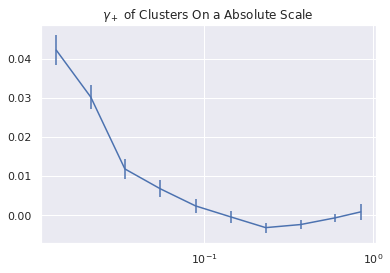

Aggregated xi:
[-29.7802 -45.0474 -28.1952 -26.3691 -15.7019   3.9474  46.9074  47.0179
  13.6586  -6.2198]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3053.9046  -5750.1596  -8044.2212 -11281.9592 -15588.2889 -19931.0606
 -22140.5059 -20042.1632 -11373.3435  -1128.252 ]
------------------------------------------------------------------------------
Aggregated npairs:
[  706.  1492.  2374.  3888.  6435. 10284. 15124. 20307. 21908.  6799.]
------------------------------------------------------------------------------
Mean xi:
[-0.0422 -0.0302 -0.0119 -0.0068 -0.0024  0.0004  0.0031  0.0023  0.0006
 -0.0009]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3256 -3.854  -3.3885 -2.9017 -2.4224 -1.9381 -1.4639 -0.987  -0.5191
 -0.1659]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

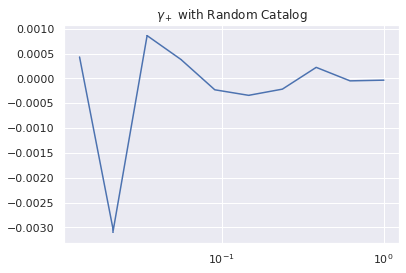

[ 4.3030e-04 -3.0562e-03  8.6036e-04  3.8116e-04 -2.2971e-04 -3.4155e-04
 -2.1683e-04  2.2134e-04 -5.0238e-05 -3.6069e-05]
[-6.8250e-06  4.8475e-05 -1.3646e-05 -6.0455e-06  3.6434e-06  5.4173e-06
  3.4391e-06 -3.5106e-06  7.9682e-07  5.7210e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

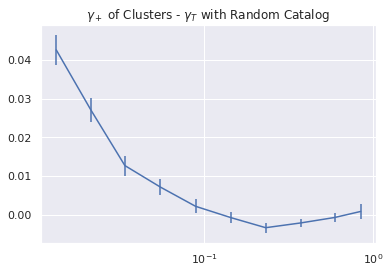

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

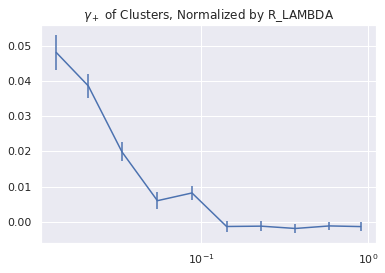

Aggregated xi:
[-18.5382 -39.8435 -38.8973 -18.2231 -40.6482  10.7688  15.6009  33.4742
  25.8295  23.6954]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1659.8878  -3989.2945  -6654.2706  -8842.8841 -12067.0815 -15815.8891
 -18645.8082 -17766.6902 -11776.2342  -1796.881 ]
------------------------------------------------------------------------------
Aggregated npairs:
[  386.  1034.  1960.  3043.  4968.  8103. 12632. 17709. 22111. 17479.]
------------------------------------------------------------------------------
Mean xi:
[-0.048  -0.0385 -0.0198 -0.006  -0.0082  0.0013  0.0012  0.0019  0.0012
  0.0014]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3002 -3.8581 -3.395  -2.906  -2.429  -1.9519 -1.4761 -1.0033 -0.5326
 -0.1028]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)